### Модули

In [1]:
from langchain_core.runnables.graph import MermaidDrawMethod
from langchain_core.messages import HumanMessage

from langgraph.types import Command
from loguru import logger
from src.agent.graph import hr_graph

from IPython.display import Image, display
import uuid


In [2]:
from dotenv import find_dotenv, dotenv_values

config = dotenv_values(find_dotenv(".env"))

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	greet(greet)
	human(human)
	router(router)
	compatibility_stub(compatibility_stub)
	interview_stub(interview_stub)
	__end__([<p>__end__</p>]):::last
	__start__ --> greet;
	greet -.-> human;
	human -.-> router;
	router -.-> compatibility_stub;
	router -.-> human;
	router -.-> interview_stub;
	compatibility_stub --> __end__;
	interview_stub --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



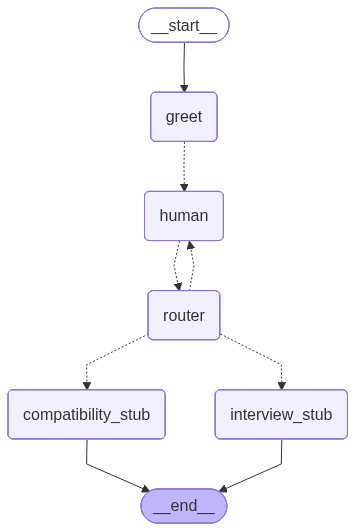

In [3]:
mermaid_src = hr_graph.get_graph(xray=1).draw_mermaid()
with open("hr_graph.mmd", "w", encoding="utf-8") as f:
    f.write(mermaid_src)
print(mermaid_src)  

mermaid_src = hr_graph.get_graph(xray=1).draw_mermaid_png(draw_method=MermaidDrawMethod.API)
display(Image(mermaid_src))


In [4]:
from uuid import uuid4
from langgraph.types import Command

cfg = {"configurable": {"thread_id": f"hr-{uuid4()}"}}

state = {
    "messages": [],
    "user_input": "",
    "intent": None,
    "meta": {},
}

for _ in hr_graph.stream(state, config=cfg, stream_mode="updates"):
    pass

# интерактив
while True:
    text = input("\nТы: ").strip()
    if text.lower() in {"q", "quit", "exit"}:
        break
    for _ in hr_graph.stream(Command(resume=text), config=cfg, stream_mode="updates"):
        pass


00:42:22.859 | CHAT      | ▶️ greet(): запуск приветствия
00:42:22.860 | CHAT      | 🤖 Приветствие: Привет! Я HR-копайлот. Могу:
1) Оценить совместимость резюме и вакансии.
2) Проанализировать интервью и дать портрет кандидата.
Сформулируй запрос в одной фразе.
00:42:34.209 | CHAT      | 💬 Пользователь: какого размера твой клитор?
00:42:34.210 | CONTEXT   | 🔍 router(): анализируем запрос: какого размера твой клитор?
00:42:35.668 | DATA      | 📩 LLM ответ для роутинга: {
    "intent": "out_of_scope",
    "relevance": {
        "compatibility": 0,
        "interview": 0
    },
    "reason": "Оффтоп"
}
00:42:35.669 | REASONING | intent=out_of_scope, relevance={'compatibility': 0, 'interview': 0}, reason='Оффтоп'
00:42:55.122 | CHAT      | 💬 Пользователь: сколько раз в неделю ты бегаешь?
00:42:55.122 | CONTEXT   | 🔍 router(): анализируем запрос: сколько раз в неделю ты бегаешь?
00:42:56.369 | DATA      | 📩 LLM ответ для роутинга: {
    "intent": "out_of_scope",
    "relevance": {
        "